   N                 Должность Язык.программирования Специализация   
0  1        Junior QA engineer                   NaN     Manual QA  \
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц   
0               0.5                          0.5               400  \
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...   
0                                 0  Харьков       до 10 человек  ...  \
1           

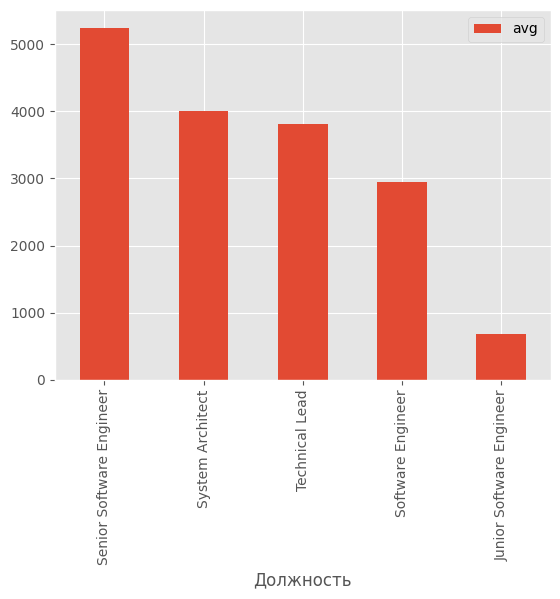

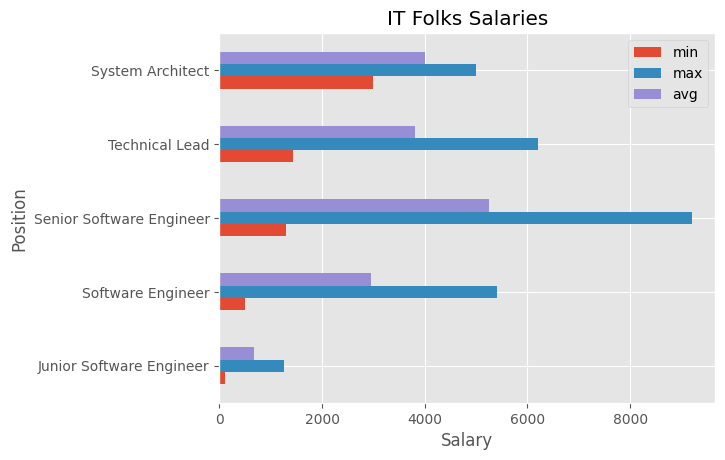

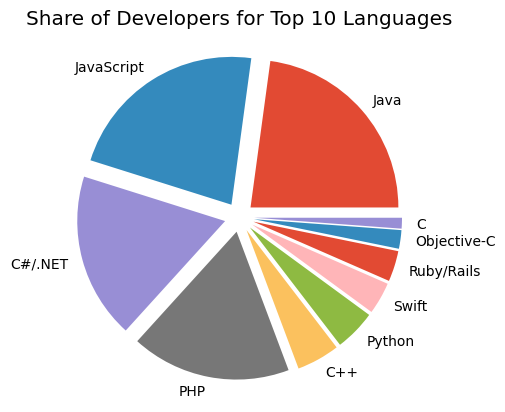

In [36]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Прочитайте файл 2017_jun_final.csv за допомогою методу read_csv
df_survey = pd.read_csv("2017_jun_final.csv")

#Прочитайте отриману таблицю, використовуючи метод head
print(df_survey.head())

#Визначте розмір таблиці за допомогою методу shape
print(df_survey.shape)

#Визначте типи всіх стовпців за допомогою dataframe.dtypes
print(df_survey.dtypes)

#Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
print(df_survey.isnull().sum())

#Видаліть усі стовпці з пропусками, крім стовпця "Мова програмування"
df_survey.drop(['Специализация','Университет','Предметная.область','Валюта','cls'], axis=1, inplace=True)

#Знову порахуйте, яка частка пропусків міститься в кожній колонці і переконайтеся, що залишився тільки стовпець "Мова.програмування"
print(df_survey.isnull().sum())

#Видаліть усі рядки у вихідній таблиці за допомогою методу dropna
df_survey.dropna(inplace=True)

#Визначте новий розмір таблиці за допомогою методу shape
print(df_survey.shape)

#Створіть нову таблицю python_data, в якій будуть тільки рядки зі спеціалістами, які вказали мову програмування Python
python_data = df_survey.query('`Язык.программирования` == "Python"')

#Визначте розмір таблиці python_data за допомогою методу shape
print(python_data.shape)

#Використовуючи метод groupby, виконайте групування за стовпчиком "Посада"
#Створіть новий DataFrame, де для згрупованих даних за стовпчиком "Посада", виконайте агрегацію даних за допомогою методу agg і знайдіть мінімальне та максимальне значення у стовпчику "Зарплата.в.місяць"
position_salary = python_data.groupby('Должность')['Зарплата.в.месяц'].agg(['min','max'])
print(position_salary.head())

#Створіть функцію fill_avg_salary, яка повертатиме середнє значення заробітної плати на місяць. Використовуйте її для методу apply та створіть новий стовпчик "avg"
def fill_avg_salary(row):
    return np.average(row)

position_salary['avg'] = position_salary.apply(lambda row: fill_avg_salary(row), axis=1)
print(position_salary.head())

#Створіть описову статистику за допомогою методу describe для нового стовпчика.
stat_avg_salary = position_salary['avg'].describe()
print(stat_avg_salary)

#Збережіть отриману таблицю в CSV файл
stat_avg_salary.to_csv('stat_avg_salary.csv')

df_chart1 = position_salary.sort_values(by='avg', ascending=False)
df_chart1.plot(kind='bar', y='avg')
plt.show()

position_salary.sort_values(by='min', ascending=True, inplace=True)
plt.style.use('ggplot')
position_salary.plot.barh()
plt.title('IT Folks Salaries')
plt.ylabel('Position')
plt.xlabel('Salary')
plt.show()

df_chart3 = df_survey[['Язык.программирования','N']].groupby(by='Язык.программирования').count().sort_values(by='N', ascending=False).head(10)
plt.pie(df_chart3['N'], labels=df_chart3.index, explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1])
plt.title('Share of Developers for Top 10 Languages')
plt.show()